# Welcome to my notebook! 
## Here we have a dataset of students from portugal in the early 2000s. I'm trying to figure out how to help teachers by figuring out which of the factors students can change have the biggest effect on their final grade. I generate a lot of visualizations, and at the end I do a basic linear regression and correlation analysis. Enjoy!

### 1. We start by importing our python libraries and our data.

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn 


df = pd.read_csv('/kaggle/input/student-final-grade-prediction-multi-lin-reg/student-mat.csv')
print(df.columns)





Index(['school', 'sex', 'age', 'address', 'famsize', 'Parrent_status',
       'Mother_edu', 'Father_edu', 'Mother_job', 'Father_job',
       'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime',
       'failures', 'extra_edu_supp', 'family_edu_supp', 'extra_paid_class',
       'extra_curr_activities', 'nursery', 'Interested_in_higher_edu',
       'internet_access', 'romantic_relationship', 'Family_quality_reln',
       'freetime_after_school', 'goout_with_friends', 'workday_alcohol_consum',
       'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')


### 2. We pick which variables to work with.

In [28]:
    selected_variables = ['address', 'traveltime', 'weekly_studytime', 'extra_curr_activities', 'Interested_in_higher_edu', 'internet_access', 'romantic_relationship', 'freetime_after_school', 'goout_with_friends', 'G3']
    new_df = df[selected_variables]
    print("\nNew DataFrame with selected columns:")
    print(new_df.columns)


New DataFrame with selected columns:
Index(['address', 'traveltime', 'weekly_studytime', 'extra_curr_activities',
       'Interested_in_higher_edu', 'internet_access', 'romantic_relationship',
       'freetime_after_school', 'goout_with_friends', 'G3'],
      dtype='object')


### 3. We do some light data cleaning by checking that the maximums and minimums all make sense. 

In [29]:
max_traveltime = new_df['traveltime'].max()
min_traveltime = new_df['traveltime'].min()
max_weekly_studytime = new_df['weekly_studytime'].max()
min_weekly_studytime = new_df['weekly_studytime'].min()
max_freetime_after_school = new_df['freetime_after_school'].max()
min_freetime_after_school = new_df['freetime_after_school'].min()
max_goout_with_friends = new_df['goout_with_friends'].max()
min_goout_with_friends = new_df['goout_with_friends'].min()
max_G3 = new_df['G3'].max()
min_G3 = new_df['G3'].min()

print(f"Maximum travel time: {max_traveltime}")
print(f"Minimum travel time: {min_traveltime}")
print(f"Maximum weekly study time: {max_weekly_studytime}")
print(f"Minimum weekly study time: {min_weekly_studytime}")
print(f"Maximum free time after school: {max_freetime_after_school}")
print(f"Minimum free time after school: {min_freetime_after_school}")
print(f"Maximum time with friends: {max_goout_with_friends}")
print(f"Minimum time with friends: {min_goout_with_friends}")
print(f"Maximum grade: {max_G3}")
print(f"Minimum grade: {min_G3}")

Maximum travel time: 4
Minimum travel time: 1
Maximum weekly study time: 4
Minimum weekly study time: 1
Maximum free time after school: 5
Minimum free time after school: 1
Maximum time with friends: 5
Minimum time with friends: 1
Maximum grade: 20
Minimum grade: 0


### 4. We change some of our data types into booleans so we can do math with them later

In [30]:
new_df.loc[df['address'] == 'U', 'address'] = 1
new_df.loc[df['address'] == 'R', 'address'] = 0
new_df.loc[df['extra_curr_activities'] == 'yes', 'extra_curr_activities'] = 1
new_df.loc[df['extra_curr_activities'] == 'no', 'extra_curr_activities'] = 0
new_df.loc[df['Interested_in_higher_edu'] == 'yes', 'Interested_in_higher_edu'] = 1
new_df.loc[df['Interested_in_higher_edu'] == 'no', 'Interested_in_higher_edu'] = 0
new_df.loc[df['internet_access'] == 'yes', 'internet_access'] = 1
new_df.loc[df['internet_access'] == 'no', 'internet_access'] = 0
new_df.loc[df['romantic_relationship'] == 'yes', 'romantic_relationship'] = 1
new_df.loc[df['romantic_relationship'] == 'no', 'romantic_relationship'] = 0
print(new_df.head(3))


  address  traveltime  weekly_studytime extra_curr_activities  \
0       1           2                 2                     0   
1       1           1                 2                     0   
2       1           1                 2                     0   

  Interested_in_higher_edu internet_access romantic_relationship  \
0                        1               0                     0   
1                        1               1                     0   
2                        1               1                     0   

   freetime_after_school  goout_with_friends  G3  
0                      3                   4   6  
1                      3                   3   6  
2                      3                   2  10  


### 5. We make a WHOLE bunch of visualizations!

Text(5, 0.015, 'Rural Students ≈ 9.5 points')

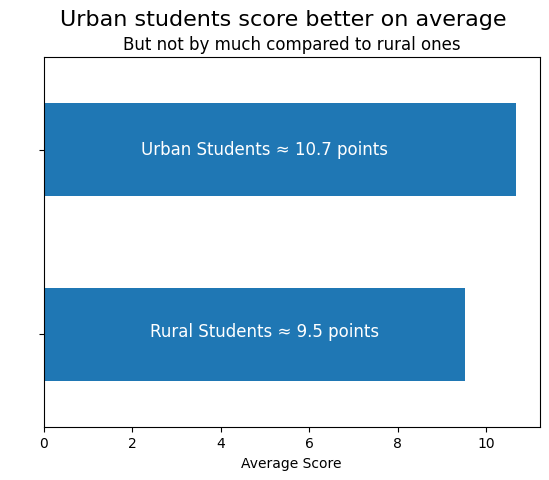

In [31]:
# Calculate average score by address
average_by_address = new_df.groupby('address')['G3'].mean()
pd.DataFrame(average_by_address)

#Create visualization
addresses = average_by_address.plot.barh()
addresses.set_yticklabels([' ', ' '])
plt.suptitle("Urban students score better on average", fontsize=16)  # Main title
plt.title("But not by much compared to rural ones", fontsize=12) # Subtitle
plt.xlabel("Average Score")
plt.ylabel(" ")
addresses.annotate('Urban Students ≈ 10.7 points', (5, 1), ha='center', va='center', color='white', size=12)
addresses.annotate('Rural Students ≈ 9.5 points', (5, 0.015), ha='center', va='center', color='white', size=12)

traveltime
1    10.782101
2     9.906542
3     9.260870
4     8.750000
Name: G3, dtype: float64


Text(5, 0.015, '1 hour commute ≈ 10.8 points')

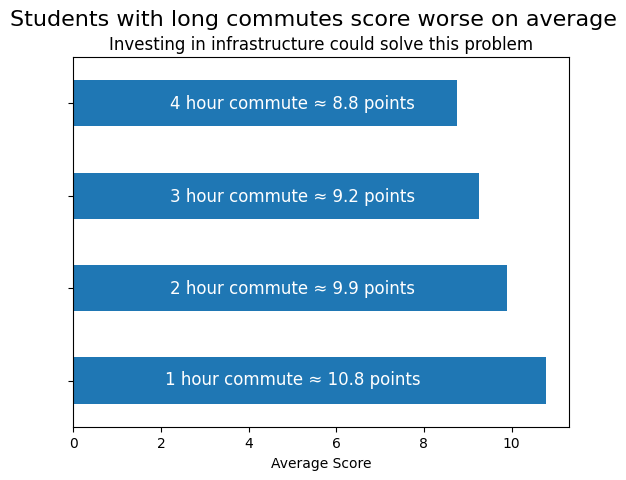

In [32]:
# Calculate average score by travel time
average_by_traveltime = new_df.groupby('traveltime')['G3'].mean()
pd.DataFrame(average_by_traveltime)
print(average_by_traveltime)

#Create visualization
addresses = average_by_traveltime.plot.barh()
addresses.set_yticklabels([' ', ' ', ' ', ' '])
plt.suptitle("Students with long commutes score worse on average", fontsize=16)  # Main title
plt.title("Investing in infrastructure could solve this problem", fontsize=12) # Subtitle
plt.xlabel("Average Score")
plt.ylabel(" ")
addresses.annotate('4 hour commute ≈ 8.8 points', (5, 3), ha='center', va='center', color='white', size=12)
addresses.annotate('3 hour commute ≈ 9.2 points', (5, 2), ha='center', va='center', color='white', size=12)
addresses.annotate('2 hour commute ≈ 9.9 points', (5, 1), ha='center', va='center', color='white', size=12)
addresses.annotate('1 hour commute ≈ 10.8 points', (5, 0.015), ha='center', va='center', color='white', size=12)

Text(5, 0.015, '1 hours weekly study ≈ 10.0 points')

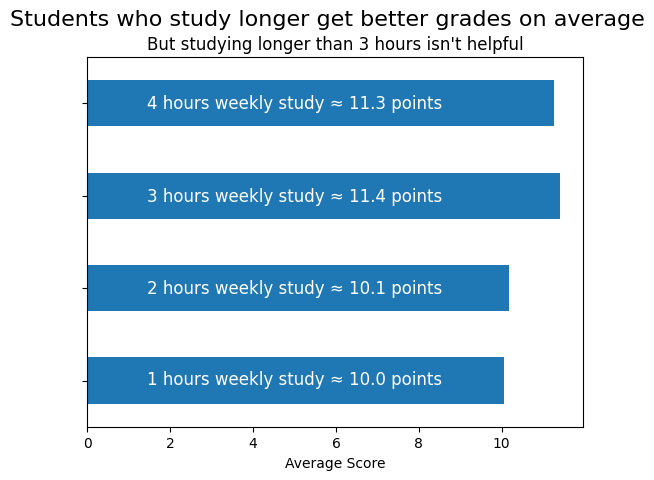

In [33]:
# Calculate average score by study time
average_by_studytime = new_df.groupby('weekly_studytime')['G3'].mean()
pd.DataFrame(average_by_studytime)

#Create visualization
addresses = average_by_studytime.plot.barh()
addresses.set_yticklabels([' ', ' ', ' ', ' '])
plt.suptitle("Students who study longer get better grades on average", fontsize=16)  # Main title
plt.title("But studying longer than 3 hours isn't helpful", fontsize=12) # Subtitle
plt.xlabel("Average Score")
plt.ylabel(" ")
addresses.annotate('4 hours weekly study ≈ 11.3 points', (5, 3), ha='center', va='center', color='white', size=12)
addresses.annotate('3 hours weekly study ≈ 11.4 points', (5, 2), ha='center', va='center', color='white', size=12)
addresses.annotate('2 hours weekly study ≈ 10.1 points', (5, 1), ha='center', va='center', color='white', size=12)
addresses.annotate('1 hours weekly study ≈ 10.0 points', (5, 0.015), ha='center', va='center', color='white', size=12)

Text(5, 0.015, 'Students not involved ≈ 10.3 points')

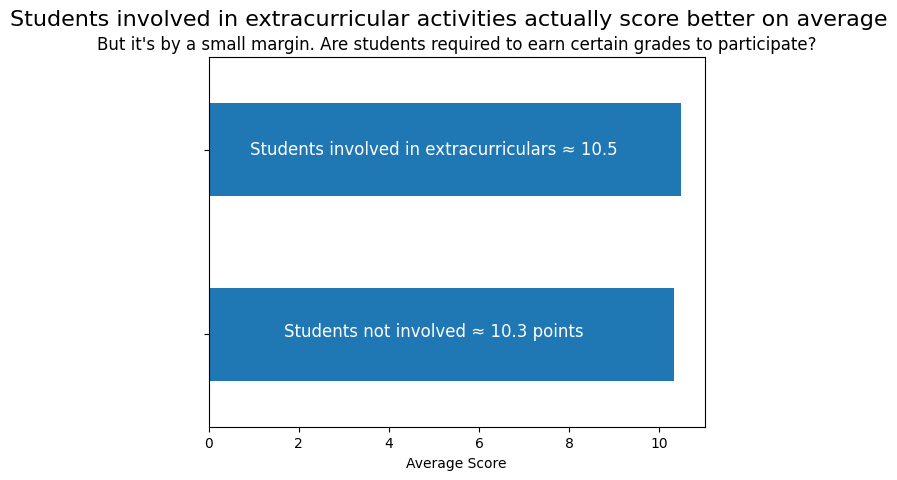

In [34]:
# Calculate average score by students in extracurriculars vs. students not in extracurriculars
average_by_extra_curr = new_df.groupby('extra_curr_activities')['G3'].mean()
pd.DataFrame(average_by_extra_curr)

#Create visualization
addresses = average_by_extra_curr.plot.barh()

#This line of code is for figuring out what to label the bars, once you know, you can get rid of it
#addresses.bar_label(addresses.containers[0])
addresses.set_yticklabels([' ', ' '])
plt.suptitle("Students involved in extracurricular activities actually score better on average", fontsize=16)  # Main title
plt.title("But it's by a small margin. Are students required to earn certain grades to participate?", fontsize=12) # Subtitle
plt.xlabel("Average Score")
plt.ylabel(" ")
addresses.annotate('Students involved in extracurriculars ≈ 10.5', (5, 1), ha='center', va='center', color='white', size=12)
addresses.annotate('Students not involved ≈ 10.3 points', (5, 0.015), ha='center', va='center', color='white', size=12)

Text(3.5, 0.015, 'Students not interested ≈ 6.8 ')

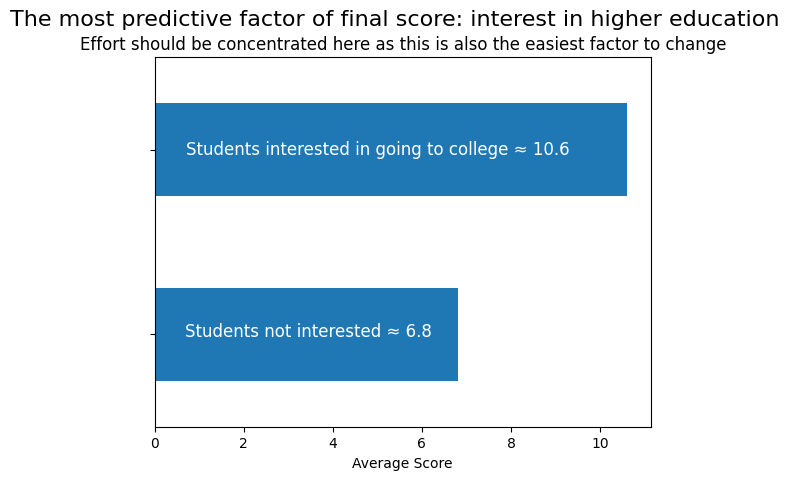

In [35]:
# Calculate average score by students interested in attending college
average_by_college = new_df.groupby('Interested_in_higher_edu')['G3'].mean()
pd.DataFrame(average_by_college)

#Create visualization
addresses = average_by_college.plot.barh()

#This line of code is for figuring out what to label the bars, once you know, you can get rid of it
#addresses.bar_label(addresses.containers[0])
addresses.set_yticklabels([' ', ' '])
plt.suptitle("The most predictive factor of final score: interest in higher education", fontsize=16)  # Main title
plt.title("Effort should be concentrated here as this is also the easiest factor to change", fontsize=12) # Subtitle
plt.xlabel("Average Score")
plt.ylabel(" ")
addresses.annotate('Students interested in going to college ≈ 10.6', (5, 1), ha='center', va='center', color='white', size=12)
addresses.annotate('Students not interested ≈ 6.8 ', (3.5, 0.015), ha='center', va='center', color='white', size=12)

Text(5, 0.015, 'Students w/o internet ≈ 9.4 ')

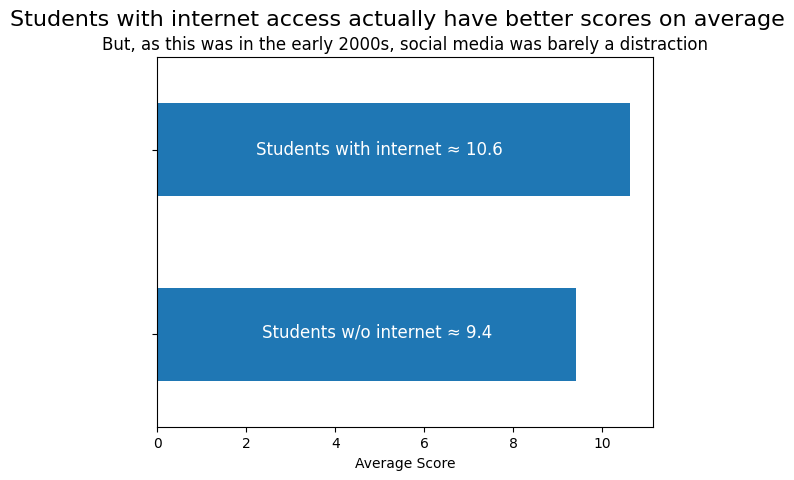

In [36]:
# Calculate average score by students with internet access
average_by_internet_access = new_df.groupby('internet_access')['G3'].mean()
pd.DataFrame(average_by_internet_access)

#Create visualization
addresses = average_by_internet_access.plot.barh()

#This line of code is for figuring out what to label the bars, once you know, you can get rid of it
#addresses.bar_label(addresses.containers[0])
addresses.set_yticklabels([' ', ' '])
plt.suptitle("Students with internet access actually have better scores on average", fontsize=16)  # Main title
plt.title("But, as this was in the early 2000s, social media was barely a distraction", fontsize=12) # Subtitle
plt.xlabel("Average Score")
plt.ylabel(" ")
addresses.annotate('Students with internet ≈ 10.6', (5, 1), ha='center', va='center', color='white', size=12)
addresses.annotate('Students w/o internet ≈ 9.4 ', (5, 0.015), ha='center', va='center', color='white', size=12)

Text(5, 0.015, 'Single students ≈ 10.8 ')

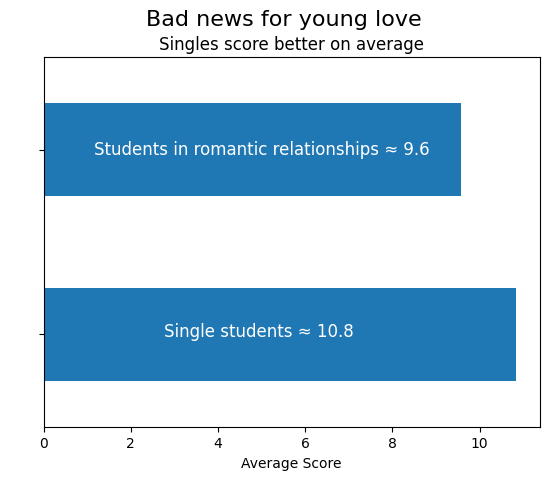

In [37]:
# Calculate average score by students with romantic relationships
average_by_romantic_relationship = new_df.groupby('romantic_relationship')['G3'].mean()
pd.DataFrame(average_by_romantic_relationship)

#Create visualization
addresses = average_by_romantic_relationship.plot.barh()

#This line of code is for figuring out what to label the bars, once you know, you can get rid of it
#addresses.bar_label(addresses.containers[0])
addresses.set_yticklabels([' ', ' '])
plt.suptitle("Bad news for young love", fontsize=16)  # Main title
plt.title("Singles score better on average", fontsize=12) # Subtitle
plt.xlabel("Average Score")
plt.ylabel(" ")
addresses.annotate('Students in romantic relationships ≈ 9.6', (5, 1), ha='center', va='center', color='white', size=12)
addresses.annotate('Single students ≈ 10.8 ', (5, 0.015), ha='center', va='center', color='white', size=12)

Text(5, 0.015, '1 hour free time ≈ 9.8 points ')

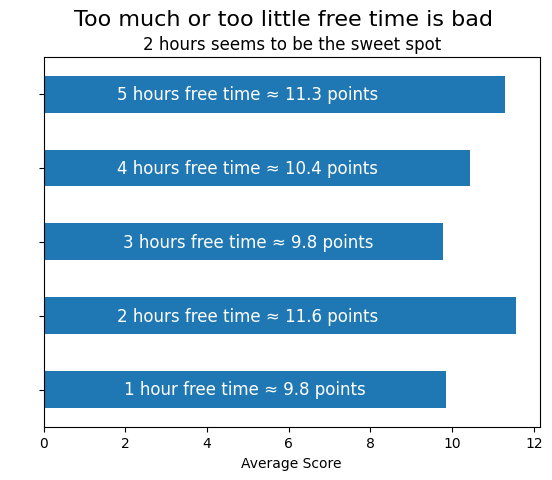

In [38]:
# Calculate average score by students with different levels of free time
average_by_freetime_after_school = new_df.groupby('freetime_after_school')['G3'].mean()
pd.DataFrame(average_by_freetime_after_school)

#Create visualization
addresses = average_by_freetime_after_school.plot.barh()

#This line of code is for figuring out what to label the bars, once you know, you can get rid of it
#addresses.bar_label(addresses.containers[0])
addresses.set_yticklabels([' ', ' ', ' ', ' ', ' '])
plt.suptitle("Too much or too little free time is bad", fontsize=16)  # Main title
plt.title("2 hours seems to be the sweet spot", fontsize=12) # Subtitle
plt.xlabel("Average Score")
plt.ylabel(" ")
addresses.annotate('5 hours free time ≈ 11.3 points', (5, 4), ha='center', va='center', color='white', size=12)
addresses.annotate('4 hours free time ≈ 10.4 points', (5, 3), ha='center', va='center', color='white', size=12)
addresses.annotate('3 hours free time ≈ 9.8 points', (5, 2), ha='center', va='center', color='white', size=12)
addresses.annotate('2 hours free time ≈ 11.6 points', (5, 1), ha='center', va='center', color='white', size=12)
addresses.annotate('1 hour free time ≈ 9.8 points ', (5, 0.015), ha='center', va='center', color='white', size=12)

Text(5, 0.015, '1 hour with friends ≈ 9.9 points ')

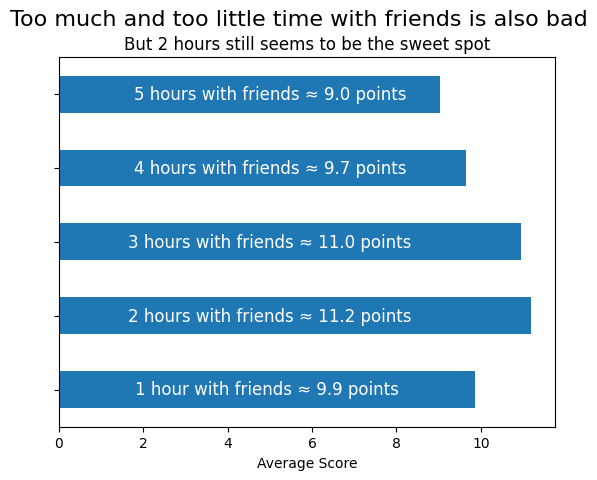

In [39]:
# Calculate average score by students with romantic relationships
average_by_goout_with_friends = new_df.groupby('goout_with_friends')['G3'].mean()
pd.DataFrame(average_by_goout_with_friends)

#Create visualization
addresses = average_by_goout_with_friends.plot.barh()

#This line of code is for figuring out what to label the bars, once you know, you can get rid of it
#addresses.bar_label(addresses.containers[0])
addresses.set_yticklabels([' ', ' ', ' ', ' ', ' '])
plt.suptitle("Too much and too little time with friends is also bad", fontsize=16)  # Main title
plt.title("But 2 hours still seems to be the sweet spot", fontsize=12) # Subtitle
plt.xlabel("Average Score")
plt.ylabel(" ")
addresses.annotate('5 hours with friends ≈ 9.0 points', (5, 4), ha='center', va='center', color='white', size=12)
addresses.annotate('4 hours with friends ≈ 9.7 points', (5, 3), ha='center', va='center', color='white', size=12)
addresses.annotate('3 hours with friends ≈ 11.0 points', (5, 2), ha='center', va='center', color='white', size=12)
addresses.annotate('2 hours with friends ≈ 11.2 points', (5, 1), ha='center', va='center', color='white', size=12)
addresses.annotate('1 hour with friends ≈ 9.9 points ', (5, 0.015), ha='center', va='center', color='white', size=12)

### 6. Now we do linear regression, which is essentially fancy math for trying to predict student scores. More analysis needed here to evaluate model robustness.

In [40]:
# This code is a basic multiple linear regression model for calculating student final grades

X = new_df[['address', 'traveltime', 'weekly_studytime', 'extra_curr_activities',
       'Interested_in_higher_edu', 'internet_access', 'romantic_relationship',
       'freetime_after_school', 'goout_with_friends']]
y = new_df['G3']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the grade of an urban student with 2 hours travel time, 2 hours of study time, who is not in an extracurricular activity
# who does want to go to college, who does not have internet access, does have a romantic relationship,
# and has 3 hours of freetime and spends 4 hours with friends
predictedGrade = regr.predict([[1, 2, 2, 0, 1, 0, 1, 3, 4]])

print(predictedGrade)

#That particular student's grade was a 6, so take that as you will.

[8.22142861]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 7. We check each variable to see which ones correlate more with student scores. A 1 represents a perfect positive correlation, a 0 represents no relation at all. Remember, correlation does not equal causation!

In [41]:
#This code is for figuring out the correlation between each of our variables and the students final grade

for column in new_df:
    correlation = new_df[column].corr(new_df['G3'])
    print(f"Correlation between {column} to final grade: {correlation}")

Correlation between address to final grade: 0.10575606393084076
Correlation between traveltime to final grade: -0.11714205281614902
Correlation between weekly_studytime to final grade: 0.0978196896531963
Correlation between extra_curr_activities to final grade: 0.01609970129581445
Correlation between Interested_in_higher_edu to final grade: 0.1824646178581576
Correlation between internet_access to final grade: 0.09848337126072886
Correlation between romantic_relationship to final grade: -0.12996995016344984
Correlation between freetime_after_school to final grade: 0.011307240308313014
Correlation between goout_with_friends to final grade: -0.13279147350332918
Correlation between G3 to final grade: 1.0
